### Ensamble of Models 
    
    - Binary Ensamble: XGB, LogReg and NB
    - Multiclass Ensamble: SVM, XGB and NB
    
    Model ensamble reduces variance in predictions and achieves better accuracy

#### 1. Binary Ensamble

In [1]:

import numpy as np
import pandas as pd
import os

os.chdir('/Users/bwilliams/GoogleDrive/UniversityOfHelsinki/Fall2020/IML/TeamProject/TermProjectIML/bin')
from SplitData import *
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


# 2. XGB Binary 
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42,
                              colsample_bytree= 0.8854654189948783, gamma=0.05056133806139512,
                              learning_rate= 0.05523204183449923, max_depth= 2, 
                              n_estimators= 267, subsample= 0.6291052025456774)

# {'colsample_bytree': 0.8854654189948783, 'gamma': 0.05056133806139512, 'learning_rate': 0.05523204183449923, 'max_depth': 2, 'n_estimators': 267, 'subsample': 0.6291052025456774}
xgb_model.fit(X_trainval, y_trainval_bin)
y_pred_train_proba_xgb = xgb_model.predict_proba(X_train)[:,0]
y_pred_val_proba_xgb = xgb_model.predict_proba(X_val)[:,0]
y_pred_test_proba_xgb = xgb_model.predict_proba(X_test)[:,0]




# 3. Log Binary 
from sklearn.linear_model import LogisticRegression
import numpy.random as npr
# Accuracy on test set:  0.8846153846153846
# Accuracy on validation set:  0.8461538461538461
# Accuracy on train set:  0.9415584415584416
npr.seed(42)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_trainval_norm, y_trainval_bin)
y_pred_train_proba_log = logistic_regression.predict_proba(X_train_norm)[:,0]
y_pred_val_proba_log = logistic_regression.predict_proba(X_val_norm)[:,0]
y_pred_test_proba_log = logistic_regression.predict_proba(X_test_norm)[:,0]



# 4. NB Binary
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
pca1 = PCA(n_components=12)
X_train_i = pca1.fit_transform(X_train)
X_test_i = pca1.transform(X_test)
X_val_i = pca1.transform(X_val)

model = GaussianNB()
model.fit(X_train_i, y_train_bin)
y_pred_train_proba_nb = model.predict_proba(X_train_i)[:,0]
y_pred_val_proba_nb = model.predict_proba(X_val_i)[:,0]
y_pred_test_proba_nb = model.predict_proba(X_test_i)[:,0]


# Blend of Models 

df_train_bin = pd.DataFrame(dict( xbb = y_pred_train_proba_xgb, log = y_pred_train_proba_log, nb = y_pred_train_proba_nb))
df_val_bin = pd.DataFrame(dict( xbb = y_pred_val_proba_xgb, log = y_pred_val_proba_log, nb = y_pred_val_proba_nb))
df_test_bin = pd.DataFrame(dict( xbb = y_pred_test_proba_xgb, log = y_pred_test_proba_log, nb = y_pred_test_proba_nb))

y_pred_train_proba_blend = df_train_bin.mean(axis = 1)
y_pred_val_proba_blend = df_val_bin.mean(axis = 1)
y_pred_test_proba_blend = df_test_bin.mean(axis = 1)


print('Accuracy on train set: ',metrics.accuracy_score(y_train_bin=='event', y_pred_train_proba_blend>0.5))
print('Accuracy on validation set: ',metrics.accuracy_score(y_val_bin=='event', y_pred_val_proba_blend>0.5))
print('Accuracy on test set: ',metrics.accuracy_score(y_test_bin=='event', y_pred_test_proba_blend>0.5))



Accuracy on train set:  0.9612403100775194
Accuracy on validation set:  0.9651162790697675
Accuracy on test set:  0.9186046511627907


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

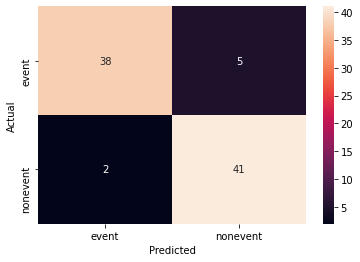

In [2]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test_bin, np.where(y_pred_test_proba_blend>0.5,'event','nonevent'), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


#### 2. Multiclass Ensamble

In [3]:
# 1. SVM MultiClass 


import numpy as np
import pandas as pd
import os

os.chdir('/Users/bwilliams/GoogleDrive/UniversityOfHelsinki/Fall2020/IML/TeamProject/TermProjectIML/bin')
from SplitData import *
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

svm_model = SVC(**{'C': 109.53031576544694, 'gamma': 0.0005494254346819604, 'kernel': 'rbf'}, probability=True)
svm_model.fit(X_trainval_norm, y_trainval)

y_pred_train_proba_svm = svm_model.predict_proba(X_train_norm)
y_pred_val_proba_svm = svm_model.predict_proba(X_val_norm)
y_pred_test_proba_svm = svm_model.predict_proba(X_test_norm)



# 2. XGB Multiclass
import xgboost as xgb

xgb_model =  xgb.XGBClassifier(**{'colsample_bytree': 0.9915346248162882, 'gamma': 0.4812236474710556, 'learning_rate': 0.10553468874760924, 'max_depth': 3, 'n_estimators': 212, 'subsample': 0.6592347719813599}, random_state=42)
xgb_model.fit(X_trainval, y_trainval)

y_pred_train_proba_xgb = xgb_model.predict_proba(X_train)
y_pred_val_proba_xgb = xgb_model.predict_proba(X_val)
y_pred_test_proba_xgb = xgb_model.predict_proba(X_test)



# 3. NB PCA
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
pca4 = PCA(n_components=14)
X_trainval_i = pca4.fit_transform(X_trainval)
X_train_i = pca4.transform(X_train)
X_test_i = pca4.transform(X_test)
X_val_i = pca4.transform(X_val)

model = GaussianNB()
model.fit(X_trainval_i, y_trainval)

y_pred_train_proba_nb = model.predict_proba(X_train_i)
y_pred_val_proba_nb = model.predict_proba(X_val_i)
y_pred_test_proba_nb = model.predict_proba(X_test_i)

y_pred_trainval_proba_nb = model.predict_proba(X_trainval_i)


# Blend of Models 

df_train_bin = pd.DataFrame(np.c_[y_pred_train_proba_svm, y_pred_train_proba_xgb, y_pred_train_proba_nb])
df_val_bin = pd.DataFrame(np.c_[y_pred_val_proba_svm, y_pred_val_proba_xgb, y_pred_val_proba_nb])
df_test_bin = pd.DataFrame(np.c_[y_pred_test_proba_svm, y_pred_test_proba_xgb, y_pred_test_proba_nb])


y_pred_train_proba_blend = np.c_[df_train_bin[[0,4,8]].mean(axis = 1), df_train_bin[[1,5,9]].mean(axis = 1), df_train_bin[[2,6,10]].mean(axis = 1) , df_train_bin[[3,7,11]].mean(axis = 1)]
y_pred_val_proba_blend = np.c_[df_val_bin[[0,4,8]].mean(axis = 1), df_val_bin[[1,5,9]].mean(axis = 1), df_val_bin[[2,6,10]].mean(axis = 1) , df_val_bin[[3,7,11]].mean(axis = 1)]
y_pred_test_proba_blend = np.c_[df_test_bin[[0,4,8]].mean(axis = 1), df_test_bin[[1,5,9]].mean(axis = 1), df_test_bin[[2,6,10]].mean(axis = 1) , df_test_bin[[3,7,11]].mean(axis = 1)]

# Multiclass Acuracy 
print('Accuracy on train set: ', metrics.accuracy_score(pd.factorize(y_train, sort=True)[0], np.argmax(y_pred_train_proba_blend, axis = 1)) )
print('Accuracy on validation set: ',  metrics.accuracy_score(pd.factorize(y_val, sort=True)[0], np.argmax(y_pred_val_proba_blend, axis = 1)) )
print('Accuracy on test set: ',  metrics.accuracy_score(pd.factorize(y_test, sort=True)[0], np.argmax(y_pred_test_proba_blend, axis = 1) ) )


# Binary Accuracy 
print('Binary accuracy on train set: ', metrics.accuracy_score(y_train == 'nonevent', np.argmax(y_pred_train_proba_blend, axis = 1)==3))
print('Binary accuracy on validation set: ',metrics.accuracy_score(y_val == 'nonevent', np.argmax(y_pred_val_proba_blend, axis = 1)==3))
print('Binary accuracy on test set: ',metrics.accuracy_score(y_test == 'nonevent', np.argmax(y_pred_test_proba_blend, axis = 1)==3))


Accuracy on train set:  0.9496124031007752
Accuracy on validation set:  0.9767441860465116
Accuracy on test set:  0.6976744186046512
Binary accuracy on train set:  0.9689922480620154
Binary accuracy on validation set:  1.0
Binary accuracy on test set:  0.9069767441860465


In [4]:
# Accuracy on umbalanced dataset 
# 38% of events  72% of nonevents
y_test == 'nonevent'
y_test_hat = np.argmax(y_pred_test_proba_blend, axis = 1)==3

acc_nonevent = np.mean(y_test_hat[y_test == 'nonevent']==True)
acc_event = np.mean(y_test_hat[~(y_test == 'nonevent')]==False)
acc = 0.5*acc_nonevent + 0.5*acc_event
print('Accuracy over Event ',acc_event)
print('Accuracy over Nonevent ',acc_nonevent)


Accuracy over Event  0.8372093023255814
Accuracy over Nonevent  0.9767441860465116


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

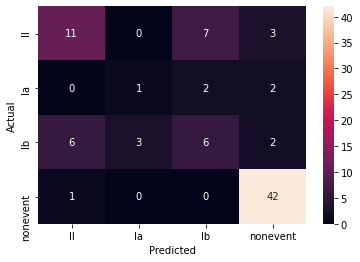

In [5]:
levels = {0:'II',1:'Ia',2:'Ib',3:'nonevent'}
y_pred_test = np.vectorize(levels.get)(np.argmax(y_pred_test_proba_blend, axis = 1))
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)